<a href="https://colab.research.google.com/github/santanukumar666/data_analysis_projects/blob/main/Copy_of_Deliveries_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('deliveries.csv')
df.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


#### indepth Analysis of David Warner(Australian Batsman) Performance

In [2]:
filt=(df['batsman']=='DA Warner')
df_warner=df[filt]
df_warner.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


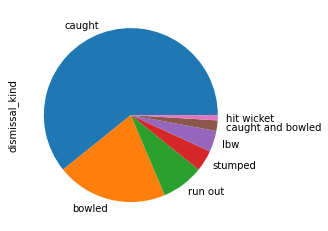

In [3]:
df_warner['dismissal_kind'].value_counts().plot.pie()

#### total fours by da warner


In [4]:
len(df_warner[df_warner['batsman_runs']==4])

401

##### total 6s by da warner

In [5]:
len(df_warner[df_warner['batsman_runs']==6])

160

##### total runs made by DA warner

In [6]:
df_warner['total_runs'].sum()

4213

##### pie chart of Runs contribution of David Warner

In [7]:
def count(df,runs):
    return len(df_warner[df_warner['batsman_runs']==runs])*runs

In [8]:
count(df_warner,1)

997

In [9]:
count(df_warner,2)

414

In [10]:
count(df_warner,3)

39

In [11]:
count(df_warner,4)

1604

In [12]:
count(df_warner,6)

960

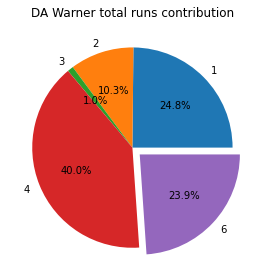

In [13]:
slices=[997,414,39,1604,960]
labels=[1,2,3,4,6]
explode=[0,0,0,0,0.1]
plt.pie(slices,labels=labels,autopct='%1.1f%%',explode=explode)
plt.title("DA Warner total runs contribution")
plt.tight_layout()
plt.show()

In [14]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [15]:
df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

##### Replacing the Team Names with their abbreviations

In [16]:


Teams={
    'Royal Challengers Bangalore':'RCB', 
    'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS',
    'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 
    'Gujarat Lions':'GL',
    'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD',
    'Chennai Super Kings':'CSK',
    'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC',
    'Kochi Tuskers Kerala':'KTK',
    'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS'
}

In [17]:
df['batting_team']=df['batting_team'].map(Teams)
df['bowling_team']=df['bowling_team'].map(Teams)

In [18]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [19]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

#### Score Distribution For Teams by Innings

In [20]:
runs=df.groupby(['match_id','inning','batting_team'])[['total_runs']].sum().reset_index()
runs.drop('match_id',axis=1,inplace=True)

In [21]:
runs.head()

,inning,batting_team,total_runs
0,1,SRH,207
1,2,RCB,172
2,1,MI,184
3,2,RPS,187
4,1,GL,183


In [22]:
inning1=runs[runs['inning']==1]
inning2=runs[runs['inning']==2]

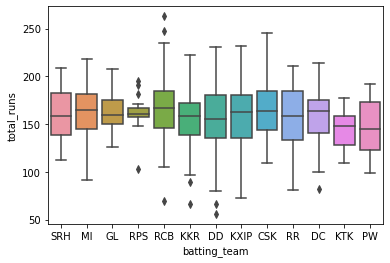

In [23]:
sns.boxplot(x='batting_team',y='total_runs',data=inning1)

##### According to this plot, the batting by CSK & RCB seems best. 

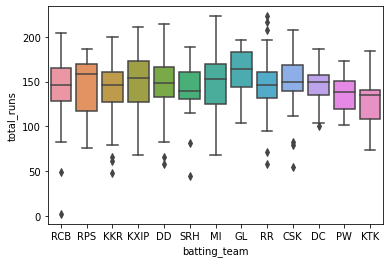

In [24]:
sns.boxplot(x='batting_team',y='total_runs',data=inning2)

##### this figure also conveys the same story.in this, we see a point near 0 for RCB which may seem to be outlier. But it is on account of the match was disrupted.

##### how many times teams scores more than 200

In [25]:
high_scores=df.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
high_scores

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
1,1,2,RCB,SRH,172
2,2,1,MI,RPS,184
3,2,2,RPS,MI,187
4,3,1,GL,KKR,183
...,...,...,...,...,...
1279,634,2,KKR,SRH,140
1280,635,1,GL,SRH,162
1281,635,2,SRH,GL,163
1282,636,1,SRH,RCB,208


In [26]:
score_200=high_scores[high_scores['total_runs']>=200]
score_200

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
16,9,1,DD,RPS,205
38,20,1,RCB,GL,213
62,32,1,SRH,KXIP,207
72,36,1,SRH,KKR,209
...,...,...,...,...,...
1250,620,1,RCB,GL,248
1256,623,1,MI,DD,206
1262,626,1,RCB,KXIP,211
1282,636,1,SRH,RCB,208


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


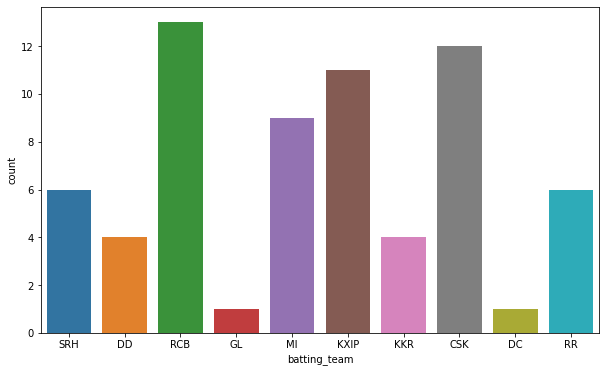

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(score_200['batting_team'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


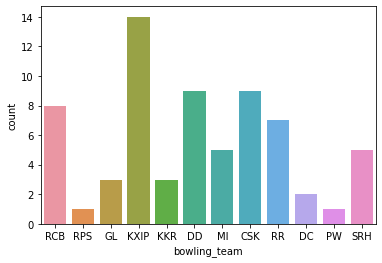

In [28]:
sns.countplot(score_200['bowling_team'])

##### 1st graph shows the number of times a team has scored above 200 runs. 2nd graph shows the number of times a bowling team has conceeded above 200 runs.

##### how many times team scores >200 runs against batting team

In [29]:
high_200=df.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_200.set_index(['match_id'],inplace=True)


In [30]:
high_200['total_runs'].max()

263

In [31]:
high_200.columns

Index(['inning', 'batting_team', 'bowling_team', 'total_runs'], dtype='object')

In [32]:
high_200.head()

,inning,batting_team,bowling_team,total_runs
match_id,,,,
1,1,SRH,RCB,207
1,2,RCB,SRH,172
2,1,MI,RPS,184
2,2,RPS,MI,187
3,1,GL,KKR,183


In [33]:
high=high_200.rename(columns={'total_runs':'count'})
high=high[high['count']>=200].groupby(['inning','batting_team','bowling_team']).count()
high

count
inning batting_team bowling_team       
1      CSK          DD                1
                    KKR               1
                    KXIP              2
                    MI                1
                    RCB               1
                    RR                1
                    SRH               2
       DC           RR                1
       DD           KXIP              1
                    MI                1
                    RPS               1
       GL           DD                1
       KKR          DC                1
                    KXIP              1
                    RCB               1
       KXIP         CSK               2
                    MI                1
                    RCB               2
                    RR                1
       MI           CSK               1
                    DD                4
                    RCB               1
                    RR                1
       RCB          CSK               1
                    DD                1
                    GL                2
                    KXIP              3
                    MI                1
                    PW                1
                    RR                1
                    SRH               1
       RR           CSK               1
                    DD                1
                    KXIP              1
       SRH          KKR               1
                    KXIP              2
                    RCB               2
                    RR                1
2      CSK          KXIP              1
                    RCB               1
                    RR                1
       DD           GL                1
       KKR          KXIP              1
       KXIP         CSK               2
                    DD                1
                    KKR               1
                    SRH               1
       MI           CSK               1
                    KXIP              1
       RCB          KXIP              1
                    SRH               1
       RR           CSK               1
                    DC                1
                    MI                1

##### Batsman Comparison

In [34]:
balls=df.groupby(['batsman'])['ball'].count().reset_index()
balls

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Flintoff,57
...,...,...
456,YV Takawale,183
457,Yashpal Singh,67
458,Younis Khan,7
459,Yuvraj Singh,2050


In [35]:
runs=df.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns=['batsman','runs']
runs

###runs=df.groupby(['batsman'])['batsman_runs'].agg(sum).reset_index()

,batsman,runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Flintoff,62
...,...,...
456,YV Takawale,192
457,Yashpal Singh,47
458,Younis Khan,3
459,Yuvraj Singh,2591


In [36]:
df.groupby(['batsman'])['batsman_runs'].agg(sum)

batsman
A Ashish Reddy     280
A Chandila           4
A Chopra            53
A Choudhary         25
A Flintoff          62
                  ... 
YV Takawale        192
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2591
Z Khan             117
Name: batsman_runs, Length: 461, dtype: int64

In [37]:
balls=balls.merge(runs,left_on='batsman',right_on='batsman',how='outer')

In [38]:
four=df[df['batsman_runs']==4]

In [39]:
''' df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()'''

runs_4=four.groupby('batsman')['batsman_runs'].count().reset_index()
runs_4.columns=['batsman','4s']
runs_4


,batsman,4s
0,A Ashish Reddy,16
1,A Chopra,7
2,A Choudhary,1
3,A Flintoff,5
4,A Kumble,3
...,...,...
363,YK Pathan,240
364,YV Takawale,26
365,Yashpal Singh,5
366,Yuvraj Singh,205


In [40]:
six=df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
six.columns=['batsman','6s']
six

,batsman,6s
0,A Ashish Reddy,15
1,A Chandila,0
2,A Chopra,0
3,A Choudhary,1
4,A Flintoff,2
...,...,...
456,YV Takawale,3
457,Yashpal Singh,0
458,Younis Khan,0
459,Yuvraj Singh,141


In [41]:
player=pd.concat([runs,balls.iloc[:,1],runs_4.iloc[:,1],six.iloc[:,1]],axis=1)
player

,batsman,runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15
1,A Chandila,4,7,7.0,0
2,A Chopra,53,75,1.0,0
3,A Choudhary,25,20,5.0,1
4,A Flintoff,62,57,3.0,2
...,...,...,...,...,...
456,YV Takawale,192,183,NaN,3
457,Yashpal Singh,47,67,NaN,0
458,Younis Khan,3,7,NaN,0
459,Yuvraj Singh,2591,2050,NaN,141


In [42]:
player['strike_rate']=player['runs']/player['ball']
player.head()

,batsman,runs,ball,4s,6s,strike_rate
0,A Ashish Reddy,280,196,16.0,15,1.428571
1,A Chandila,4,7,7.0,0,0.571429
2,A Chopra,53,75,1.0,0,0.706667
3,A Choudhary,25,20,5.0,1,1.250000
4,A Flintoff,62,57,3.0,2,1.087719


In [43]:
player.isna().sum()

batsman         0
runs            0
ball            0
4s             93
6s              0
strike_rate     0
dtype: int64

In [44]:
player['4s'].fillna(0,inplace=True)

In [45]:
player.isnull().values.any()

False

In [46]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [47]:
grp=df.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index()
grp

,match_id,batsman,batting_team,batsman_runs
0,1,A Choudhary,RCB,6
1,1,BCJ Cutting,SRH,16
2,1,CH Gayle,RCB,32
3,1,DA Warner,SRH,14
4,1,DJ Hooda,SRH,16
...,...,...,...,...
9510,636,SR Watson,RCB,11
9511,636,STR Binny,RCB,9
9512,636,Sachin Baby,RCB,18
9513,636,V Kohli,RCB,54


In [48]:
max=grp.groupby(['batsman'])['batsman_runs'].max().reset_index()
max.columns=['batsman','max_runs']
max

,batsman,max_runs
0,A Ashish Reddy,36
1,A Chandila,4
2,A Chopra,24
3,A Choudhary,15
4,A Flintoff,24
...,...,...
456,YV Takawale,45
457,Yashpal Singh,20
458,Younis Khan,3
459,Yuvraj Singh,83


In [49]:
player2=pd.concat([player,max.iloc[:,1:3]],axis=1)
player2

,batsman,runs,ball,4s,6s,strike_rate,max_runs
0,A Ashish Reddy,280,196,16.0,15,1.428571,36
1,A Chandila,4,7,7.0,0,0.571429,4
2,A Chopra,53,75,1.0,0,0.706667,24
3,A Choudhary,25,20,5.0,1,1.250000,15
4,A Flintoff,62,57,3.0,2,1.087719,24
...,...,...,...,...,...,...,...
456,YV Takawale,192,183,0.0,3,1.049180,45
457,Yashpal Singh,47,67,0.0,0,0.701493,20
458,Younis Khan,3,7,0.0,0,0.428571,3
459,Yuvraj Singh,2591,2050,0.0,141,1.263902,83


In [50]:
player2.shape

(461, 7)

#### Top 10 Batsman

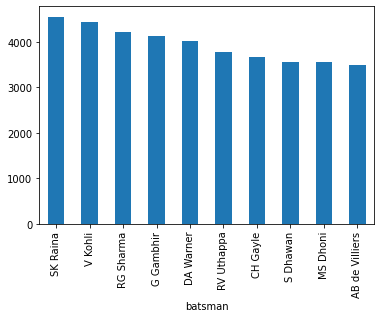

In [51]:
max_runs=df.groupby(['batsman'])['batsman_runs'].sum()
max_runs.sort_values(ascending=False)[:10].plot.bar()

#### SK Raina has highest total runs across all seasons Whereas Virat Kohliis just few runs behind with the second spot 

#### Top Individual Scores

In [52]:
df.groupby(["match_id","batsman",'batting_team'])["batsman_runs"].sum().reset_index().sort_values(by='batsman_runs', ascending=False).head(10)

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
3686,243,PC Valthaty,KXIP,120
4223,279,V Sehwag,DD,119


#### Not only Gayle but there are many RCB players on the top scores list. Looks like RCB is a very formidable batting side.

##### Highest Wicket Taker

In [53]:
df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [54]:
dismissal_kinds = ['caught', 'bowled', 'lbw', 'caught and bowled',
       'stumped', 'hit wicket']

In [55]:
hwt=df[df["dismissal_kind"].isin(dismissal_kinds)]
hwt.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,SRH,RCB,2,5,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,SRH,RCB,11,3,S Dhawan,MC Henriques,STR Binny,0,0,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,SRH,RCB,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,SRH,RCB,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,0,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,RCB,SRH,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,0,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN


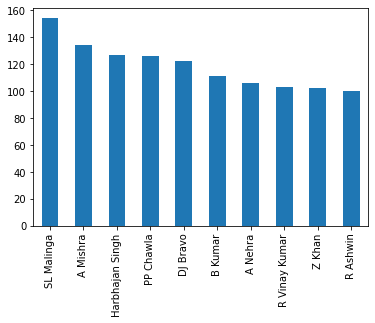

In [56]:
hwt['bowler'].value_counts()[:10].plot.bar()

##### Lasith Malinga leads the chart, 